A Simple RNN Task: 利用RNN的二元分类网络区分不同函数

In [28]:
%pip install torch numpy matplotlib 
# restart kernel after installation

Looking in indexes: https://mirrors.zju.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
DATA_SIZE = 1000

sine_data_size = np.random.randint(int(0.3 * DATA_SIZE), int(0.7 * DATA_SIZE))
sigmoid_data_size = DATA_SIZE - sine_data_size

steps = np.arange(0, 10, 0.5)

# generate sine-like function samples
sine_init = np.random.uniform(-3, 3, (sine_data_size, 2))  # randomize a and b for sin(ax+b)
sine_data = np.sin(sine_init[:, :1] * steps + sine_init[:, 1:])

# generate sigmoid-like function samples
sigmoid_init = np.random.uniform(-3, 3, (sigmoid_data_size, 2)) # randomize a and b for 1/(1+e^(-ax+b))
sigmoid_data = 1 / (1 + np.exp(0 - sigmoid_init[:, :1] * steps + sigmoid_init[:, 1:]))

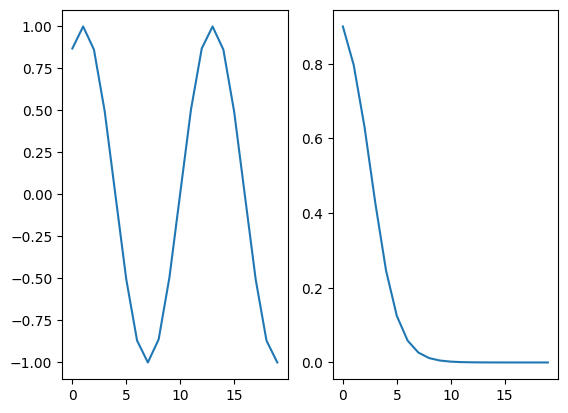

In [31]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(sine_data[0])
axs[1].plot(sigmoid_data[1])

In [32]:
# mix data
sine_data = np.concatenate((sine_data, np.ones((sine_data_size, 1))), axis=1)
sigmoid_data = np.concatenate((sigmoid_data, np.zeros((sigmoid_data_size, 1))), axis=1)
data = np.concatenate((sine_data, sigmoid_data), axis=0)
data = torch.Tensor(data)

In [33]:
# split two datasets

from torch.utils.data import random_split
train_set, test_set = random_split(data, [0.8, 0.2])


In [34]:
# define network

class SimpleClassificationRNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleClassificationRNN, self).__init__()
        '''
        task 1: write network structure here using nn.RNN
        '''
        super(SimpleClassificationRNN, self).__init__()
        self.rnn = nn.RNN(input_size=1,
                          hidden_size=hidden_size,
                          batch_first=True,
                          num_layers=1)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, seq, hc=None):
        '''
        task 2: write forward process
        '''
        tmp, hc = self.rnn(seq, hc)
        out = torch.sigmoid(self.linear(hc[-1, ... ,:]))
        return out, hc

In [35]:
hidden_size = 16
learning_rate = 0.01

model = SimpleClassificationRNN(hidden_size)

'''
task 3: select appropriate criterion and optimizer
'''
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [36]:
def cal_accuracy(preds, true_values):
    preds = torch.where(preds>0.5, 1, 0)
    acc = torch.sum(1-torch.abs(preds-true_values)) / preds.shape[0]
    return acc

In [37]:
# training ...

epochs = 500
loss_log = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output, _ = model(train_set[:][:, :-1, np.newaxis])
    loss = criterion(output.view(-1), train_set[:][:, -1])
    acc = cal_accuracy(output.view(-1), train_set[:][:, -1])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("Epoch {}: loss {} acc {}".format(epoch, loss.item(), acc))

Epoch 0: loss 0.6913495063781738 acc 0.6974999904632568
Epoch 10: loss 0.5635299682617188 acc 0.6800000071525574
Epoch 20: loss 0.4275299906730652 acc 0.800000011920929
Epoch 30: loss 0.23760555684566498 acc 0.9150000214576721
Epoch 40: loss 0.32805705070495605 acc 0.8687499761581421
Epoch 50: loss 0.16831377148628235 acc 0.9424999952316284
Epoch 60: loss 0.1811053454875946 acc 0.9337499737739563
Epoch 70: loss 0.08120312541723251 acc 0.9837499856948853
Epoch 80: loss 0.06773427128791809 acc 0.9850000143051147
Epoch 90: loss 0.06375081837177277 acc 0.987500011920929
Epoch 100: loss 0.06102129817008972 acc 0.987500011920929
Epoch 110: loss 0.05679013580083847 acc 0.987500011920929
Epoch 120: loss 0.08360126614570618 acc 0.981249988079071
Epoch 130: loss 0.1912514567375183 acc 0.9487500190734863
Epoch 140: loss 0.11921631544828415 acc 0.96875
Epoch 150: loss 0.08172059804201126 acc 0.981249988079071
Epoch 160: loss 0.06812889873981476 acc 0.9825000166893005
Epoch 170: loss 0.063652209937

In [38]:
# performance on test set

output, _ = model(test_set[:][:, :-1, np.newaxis])
loss = criterion(output.view(-1), test_set[:][:, -1])
acc = cal_accuracy(output.view(-1), test_set[:][:, -1])

print("Test set: loss {} acc {}".format(loss.item(), acc))

Test set: loss 0.025837667286396027 acc 0.9950000047683716


## Example Solution

In [39]:
# define network

class SimpleClassificationRNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleClassificationRNN, self).__init__()
        self.rnn = nn.RNN(input_size=1,
                          hidden_size=hidden_size,
                          batch_first=True,
                          num_layers=1)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, seq, hc=None):
        tmp, hc = self.rnn(seq, hc)
        out = torch.sigmoid(self.linear(hc[-1, ... ,:]))
        return out, hc

In [40]:
hidden_size = 16
learning_rate = 0.01

model = SimpleClassificationRNN(hidden_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), learning_rate)

# you can also test other optimizers and learning_rate settings ...

In [41]:
def cal_accuracy(preds, true_values):
    preds = torch.where(preds>0.5, 1, 0)
    acc = torch.sum(1-torch.abs(preds-true_values)) / preds.shape[0]
    return acc

# you can also implement other metrics like F1 ...

In [42]:
epochs = 500
loss_log = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output, _ = model(train_set[:][:, :-1, np.newaxis])
    loss = criterion(output.view(-1), train_set[:][:, -1])
    acc = cal_accuracy(output.view(-1), train_set[:][:, -1])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("Epoch {}: loss {} acc {}".format(epoch, loss.item(), acc))

# you can also implement early stopping here ...

Epoch 0: loss 0.6931350231170654 acc 0.6800000071525574
Epoch 10: loss 0.5678759217262268 acc 0.6800000071525574
Epoch 20: loss 0.36400237679481506 acc 0.8412500023841858
Epoch 30: loss 0.27098962664604187 acc 0.9125000238418579
Epoch 40: loss 0.20967544615268707 acc 0.9262499809265137
Epoch 50: loss 0.14930379390716553 acc 0.9587500095367432
Epoch 60: loss 0.1620345115661621 acc 0.9399999976158142
Epoch 70: loss 0.13502995669841766 acc 0.9674999713897705
Epoch 80: loss 0.07237621396780014 acc 0.9825000166893005
Epoch 90: loss 0.08006221055984497 acc 0.981249988079071
Epoch 100: loss 0.09009793400764465 acc 0.9750000238418579
Epoch 110: loss 0.06997528672218323 acc 0.987500011920929
Epoch 120: loss 0.35317811369895935 acc 0.8812500238418579
Epoch 130: loss 0.22460366785526276 acc 0.9237499833106995
Epoch 140: loss 0.19461721181869507 acc 0.956250011920929
Epoch 150: loss 0.104280985891819 acc 0.9725000262260437
Epoch 160: loss 0.0676925778388977 acc 0.9837499856948853
Epoch 170: loss 0

In [43]:
output, _ = model(test_set[:][:, :-1, np.newaxis])
loss = criterion(output.view(-1), test_set[:][:, -1])
acc = cal_accuracy(output.view(-1), test_set[:][:, -1])

print("Test set: loss {} acc {}".format(loss.item(), acc))

Test set: loss 0.49618667364120483 acc 0.8100000023841858
